# Milestone 1 <br>
#### Nama: Muhammad Vincar Rafi Theoseta <br>
#### Batch: HCK-018 <br>

Notebook ini bertujuan menganalisa data-data dari dataset apartments_for_rent_classified_10k yang berisi informasi terkait listing apartemen. 

Link Dashboard: <br>
https://public.tableau.com/views/Milestone1_17200887994370/Dashboard2?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Identifikasi Masalah <br>
### Latar Belakang
Sebagai Data Analyst untuk suatu developer apartemen di suatu negara bagian AS yang ingin membangun sebuah bangunan apartemen. Saya diberi tugas untuk menganalisis data dari listing apartemen di negara AS untuk mengidentifikasi faktor yang dapat meningkatkan penjualan unit apartemen.

### SMART: <br>
S: Meningkatkan penjualan unit apartemen <br>
M: Penjualan unit naik sebesar 15% <br>
A: Dapat dilakukan dengan meningkatkan fasilitas unit serta meningkatkan promosi. <br>
R: Dengan meningkatkan fasilitas serta promosi, penjualan akan bertambah dan berujung kepada pendapatan <br>
T: Dapat dilakukan dalam kurun waktu 12 bulan. <br> 

### Problem Statement: <br>
Meningkatkan penjualan unit apartemen sebesar 15% dengan meningkatkan fasilitas dan promosi dalam 12 bulan

### Problem Breakdown: <br>
Main Problem: <br>
Meningkatkan penjualan unit apartemen

Penjabaran Masalah: <br>
- Berapa luas rata-rata  unit apartemen di tiap state?<br>
- State apa yang memiliki unit apartemen paling banyak?<br>
- Berapa persentase apartemen yang memperbolehkan peliharaan?<br>
- State apa memiliki rata-rata harga tertinggi? <br>
- Apakah ada perbedaan signifikan antara rata-rata harga 2 state metropolitan dan satelit NY dengan NJ? <br>
- Apa faktor yang dapat meningkatkan penjualan unit?<br>


## Data Loading

In [34]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
df1 = pd.read_csv("/Users/vincartheoseta/Hacktiv/Phase 0/Milestone/p0-ftds018-hck-m1-vincar12/apartments_for_rent_classified_10K.csv", sep=";", encoding='cp1252')
df1.head(3)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410


### Data Exploration

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

Insight: Dari informasi di atas terlihat jumlah baris data sebesar 10000 dengan jumlah kolom 21. Terdapat 8 kolom yang bersifat numerik dan sisanya object. Nilai null terbesar jatuh pada kolom pets_allowed, disusul oleh amenities dan address.

## Data Cleaning

Melihat kategori apa saja yang termasuk dalam data

In [37]:
df1["category"].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term'], dtype=object)

Menggunakan conditions untuk filter data kolom body yang memiliki karakter "include" atau "includes" dan memiliki value NaN di kolom amenities. Hal ini dilakukan untuk membuang data-data yang memasukkan amenities ke dalam kolom body namun mengosongkan kolom amenities agar tidak mengubah data secara signifikan. Lalu melakukan filter kolom "category" dengan karakter "apartment" agar mengambil data apartemen saja.

In [38]:
condition1 = df1["body"].str.contains("include|includes")
condition2 = df1["amenities"].isna()
dfc = df1[~(condition1 & condition2)]
dfc = dfc.reset_index(drop=True)
dfc = dfc[dfc["category"].str.contains("apartment")]
dfc = dfc.reset_index(drop=True)
dfc.head(3)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410


Melihat nilai unik pada kolom amenities

In [39]:
dfc["amenities"].unique()

array([nan, 'Dishwasher,Elevator,Patio/Deck,Pool,Storage', 'Refrigerator',
       ...,
       'Cable or Satellite,Dishwasher,Fireplace,Parking,Patio/Deck,Refrigerator,Wood Floors',
       'Elevator,Gym,Parking,Patio/Deck,Pool,Storage,Tennis,View',
       'Basketball,Cable or Satellite,Doorman,Hot Tub,Internet Access,Parking,Playground,Pool,Storage,Washer Dryer'],
      dtype=object)

Terlihat bahwa data-data dalam kolom amenities terpisahkan oleh koma, dapat menggunakan fungsi split untuk memisahkan

Membuat fungsi count_amenities untuk menghitung jumlah amenities dengan cara menghitung data yang dipisahkan oleh tanda koma.

In [40]:
def count_amenities(amenities):
    if pd.isna(amenities):
        return 0
    elif amenities: 
        return len(amenities.split(","))

dfc["amenities"] = df1["amenities"].apply(count_amenities)

dfc["amenities"].unique()

array([ 0,  5,  1,  8,  7,  2,  4,  3,  6, 11, 12,  9, 14, 10, 15, 13, 16,
       17, 18])

Mengisi nilai NaN pada kolom bathrooms dan bedrooms dengan nilai 0 agar dapat dianalisa

In [41]:
dfc[["bathrooms", "bedrooms"]] = dfc[["bathrooms", "bedrooms"]].fillna(0) 
dfc["bedrooms"].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Melihat data unik dari kolom has_photo

In [42]:
dfc["has_photo"].unique()

array(['Thumbnail', 'Yes', 'No'], dtype=object)

Memasukkan nilai 0 untuk value "No", 0.5 untuk "Thumbnail", dan 1 untuk "Yes" agar mempermudah analisis

In [43]:
photo_value = {"Thumbnail":0.5, "Yes":1, "No":0}
dfc["has_photo"] = dfc["has_photo"].replace(photo_value)
dfc["has_photo"].unique()

array([0.5, 1. , 0. ])

Melihat data unik dari kolom pets_allowed

In [44]:
dfc["pets_allowed"].unique()

array([nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

Memasukkan nilai 0 untuk value NaN, 0.5 untuk "Cats" atau "Dogs", dan 1 untuk "Cats,Dogs" agar mempermudah analisis

In [45]:
pet_value = {"Cats": 0.5, "Cats,Dogs": 1, "Dogs": 0.5}
dfc["pets_allowed"] = dfc["pets_allowed"].fillna(0)
dfc["pets_allowed"] = dfc["pets_allowed"].replace(pet_value)
dfc["pets_allowed"].unique()

array([0. , 1. , 0.5])

Mengubah kolom time dari unix timestamp menjadi datetime

In [46]:
dfc["time"] = pd.to_datetime(dfc["time"], unit="s")
dfc.head(3)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",0,0.0,0.0,USD,No,0.5,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,2019-12-26 11:23:35
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",0,0.0,1.0,USD,No,0.5,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,2019-12-22 12:17:43
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",0,1.0,0.0,USD,No,0.5,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30


Menghapus data kolom state yang masih null

In [47]:
dfc.dropna(subset=["state"], inplace=True)
dfc = dfc.reset_index(drop=True)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9739 non-null   int64         
 1   category       9739 non-null   object        
 2   title          9739 non-null   object        
 3   body           9739 non-null   object        
 4   amenities      9739 non-null   int64         
 5   bathrooms      9739 non-null   float64       
 6   bedrooms       9739 non-null   float64       
 7   currency       9739 non-null   object        
 8   fee            9739 non-null   object        
 9   has_photo      9739 non-null   float64       
 10  pets_allowed   9739 non-null   float64       
 11  price          9739 non-null   int64         
 12  price_display  9739 non-null   object        
 13  price_type     9739 non-null   object        
 14  square_feet    9739 non-null   int64         
 15  address        6523 n

Menghapus kolom yang tidak digunakan dalam analisis seperti:
- category, karena semua sudah berkategori "apartment"
- price type, karena semua bernilai "Monthly"
- latitude dan longitude, karena dapat menggunakan data cityname dan state sebagai pengganti
- fee, karena semua bernilai "No"
- currency, karena semua bernilai USD
- address, karena dapat menggunakan cityname dan state sebagai pengganti
- title, karena hanya berisi judul listing apartemen
- body, karena sudah dilakukan cleaning dan filter sehingga tidak lagi dibutuhkan untuk analisis

In [48]:
apt = dfc.drop(["category", "price_type", "latitude", "longitude", "fee", "currency", "address", "price_display", "title", "body"], axis=1)
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9739 non-null   int64         
 1   amenities     9739 non-null   int64         
 2   bathrooms     9739 non-null   float64       
 3   bedrooms      9739 non-null   float64       
 4   has_photo     9739 non-null   float64       
 5   pets_allowed  9739 non-null   float64       
 6   price         9739 non-null   int64         
 7   square_feet   9739 non-null   int64         
 8   cityname      9739 non-null   object        
 9   state         9739 non-null   object        
 10  source        9739 non-null   object        
 11  time          9739 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 913.2+ KB


## Analysis

### Test central tendency dan normality

Menemukan nilai rata-rata, median, deviasi, skew, dan kurtosis pada kolom price

In [49]:
print("Average price of apartments:",apt["price"].mean())
print("Median of price:",apt["price"].median())
print("Mode of price:",apt["price"].mode().values[0])
print("Standard Deviation of price data:",apt["price"].std())
print("Skewness:", apt["price"].skew())
print("Kurtosis:" ,apt["price"].kurtosis())

Average price of apartments: 1491.075161720916
Median of price: 1275.0
Mode of price: 1350
Standard Deviation of price data: 1085.853095807549
Skewness: 14.355853902333365
Kurtosis: 542.4730293960718


Dari penemuan di atas, terlihat bahwa data pada kolom price tidak memiliki persebaran normal.

Menggunakan normal test dan shapiro untuk mengkonfirmasi jenis persebaran data

In [50]:
res = stats.normaltest(apt["price"])
print(f"normal test p-value: {res.pvalue}")

res = stats.shapiro(apt["price"])
print(f"shapiro test p-value: {res.pvalue}")

normal test p-value: 0.0
shapiro test p-value: 0.0


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



Terlihat bahwa data tetap terbukti tidak normal

### Membuang data outlier

Berdasarkan analisis central tendency dan skewness di atas, terlihat data tidak normal. Hal ini dapat didukung dengan visualisasi histogram dan boxplot

<Axes: >

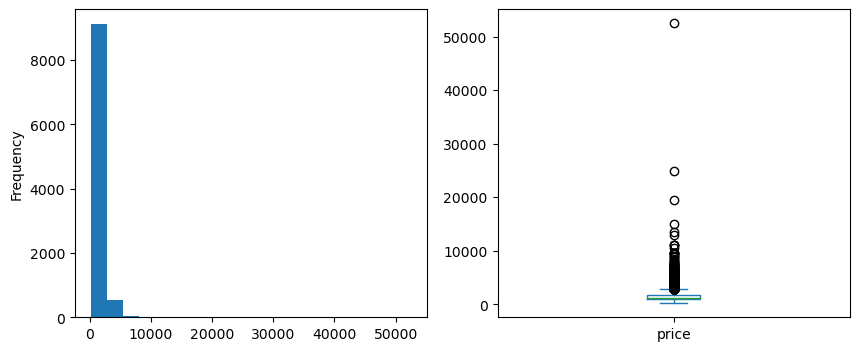

In [51]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

apt["price"].plot(kind='hist',bins=20,ax=ax[0])
apt["price"].plot(kind='box',ax=ax[1])

Karena persebaran data yang tidak normal, tukey rule digunakan dalam penemuan outlier. Setelah menemukan nilai upper boundary dan lower boundary, maka nilai dalam kolom harga yang tidak termasuk batas-batas tersebut dianggap outlier

In [52]:
q1 = apt["price"].quantile(0.25)
q3 = apt["price"].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f"Upper Boundary: {up_bound:.2f}" )
print(f"Lower Boundary: {low_bound:.2f}")

Upper Boundary: 2822.50
Lower Boundary: -173.50


Ditemukan nilai upper boundary sebesar 2822.50 dan nilai lower boundary sebesar -173.50

In [53]:
outlier = apt["price"][(apt["price"]<low_bound) | (apt["price"]>up_bound)]
no_outlier = apt["price"][(apt["price"]>=low_bound) & (apt["price"]<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(apt["price"]):.2f}%')

Percentage of outliers: 6.26%


Persentase data yang merupakan outlier sebesar 6.26% dari data awal

<Axes: >

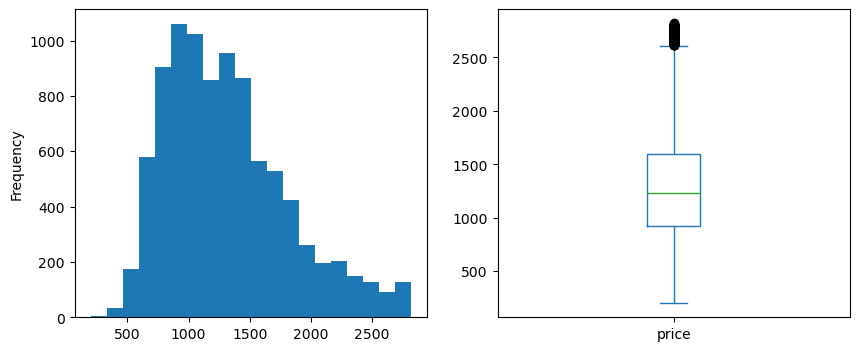

In [54]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [55]:
apt = apt[(apt["price"]>=low_bound) & (apt["price"]<=up_bound)]
apt = apt.reset_index(drop=True)
apt

,id,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,source,time
0,5668626895,0,0.0,0.0,0.5,0.0,790,101,Washington,DC,RentLingo,2019-12-26 11:23:35
1,5664597177,0,0.0,1.0,0.5,0.0,425,106,Evansville,IN,RentLingo,2019-12-22 12:17:43
2,5668626833,0,1.0,0.0,0.5,0.0,1390,107,Arlington,VA,RentLingo,2019-12-26 11:23:30
3,5659918074,0,1.0,0.0,0.5,0.0,925,116,Seattle,WA,RentLingo,2019-12-18 11:15:43
4,5668626759,0,0.0,0.0,0.5,0.0,880,125,Arlington,VA,RentLingo,2019-12-26 11:23:21
...,...,...,...,...,...,...,...,...,...,...,...,...
9124,5668617167,0,4.0,5.0,0.5,1.0,2599,3966,Lexington,SC,RentLingo,2019-12-26 11:12:54
9125,5664596757,0,3.5,5.0,0.5,0.5,2550,4000,Saint Leonard,MD,RentLingo,2019-12-22 12:16:56
9126,5664597936,3,4.5,4.0,0.5,0.0,2500,4500,Blacksburg,VA,RentLingo,2019-12-22 12:18:48
9127,5668627076,0,3.5,5.0,0.5,1.0,2395,4614,Houston,TX,RentLingo,2019-12-26 11:23:49


### Rata-rata luas unit apartemen di tiap state

Mengelompokkan data-data yang memiliki state sama ke dalam satu kelompok dengan fungsi groupby. Lalu menghitung rata-rata luas apartemen dengan fungsi mean serta mengurutkan data dari rata-rata tertinggi

In [56]:
apt_square = apt.groupby("state")["square_feet"].mean().sort_values(ascending=False)
apt_square = apt_square.reset_index()
apt_square.head(3)

,state,square_feet
0,WV,1581.666667
1,SC,1427.546667
2,MT,1314.000000


Membuat visualisasi dengan plotly express berbentuk bar chart untuk menunjukkan rata-rata luas apartemen di tiap state. Skala Y menunjukkan besaran luas apartemen dan skala X menunjukkan kode negara bagian

In [57]:
fig1 = px.bar(apt_square, x="state", y="square_feet",
             title="Average Square Feet by State",
             color="square_feet",
             color_continuous_scale="Emrld")
fig1.update_layout(title_x = 0.5)
fig1.show()

Insight: Terlihat bahwa rata-rata luas apartemen terbesar berada di state West Virginia sebesar 1581.66sqft, disusul oleh Montana dan New York. Sedangkan rata-rata luas apartemen terkecil berada di state District of Columbia dengan 537.37sqft

### State dengan jumlah listing apartemen terbanyak

Menggunakan fungsi groupby untuk mengelompokkan data-data dalam id ke dalam state masing-masing. Lalu fungsi count digunakan untuk menghitung jumlah id dalam setiap state serta diurutkan dari nilai tertinggi. 

In [58]:
apt_tot = apt.groupby("state")["id"].count().sort_values(ascending=False)
apt_tot = apt_tot.reset_index()
apt_tot.head(3)

,state,id
0,TX,1701
1,CA,619
2,WA,470


Membuat visualisasi dengan plotly express berbentuk bar chart untuk menunjukkan jumlah apartemen yang dipasarkan di tiap state. Skala Y menunjukkan besaran banyaknya apartemen yang dipasarkan dan skala X menunjukkan kode negara bagian

In [59]:
fig2 = px.bar(apt_tot, x="state", y="id",
             title="Apartment listings by State",
             color="id",
             color_continuous_scale="burg")
fig2.update_layout(title_x = 0.5)
fig2.show()

Insight: Dari visualisasi dapat terlihat bahwa state Texas memiliki jumlah apartemen yang dipasarkan terbanyak cukup jauh melebihi state lain sejumlah 1709 apartemen. Disusul oleh California dengan 619 dan Washington dengan 470 apartemen. Jumlah listing terkecil didapat dari state Wyoming dengan hanya 1 apartemen dipasarkan

### Persentase apartemen yang memperbolehkan hewan

Mengelompokkan data id berdasarkan data pets_allowed dimana 1 berarti memperbolehkan baik anjing maupun kucing, 0.5 berarti memperbolehkan salah satu, 0 berarti melarang.

In [60]:
apt_pet = apt.groupby("pets_allowed")["id"].count().sort_values(ascending=False)
apt_pet = apt_pet.reset_index()
apt_pet

,pets_allowed,id
0,1.0,4848
1,0.0,3737
2,0.5,544


Menghitung persentase apartemen yang memperbolehkan hewan dengan membagi total id yang sudah dikelompokkan dengan total seluruh id

In [61]:
apt_pet["percent"] = (apt_pet["id"] / apt_pet["id"].sum()) * 100
apt_pet

,pets_allowed,id,percent
0,1.0,4848,53.105488
1,0.0,3737,40.935480
2,0.5,544,5.959032


Menggunakan plotly express untuk menampilkan visualisasi pie chart dengan nilai persentase yang baru dihitung dan labelnya berdasarkan pengelompokkan di awal.

In [62]:
fig3 = px.pie(apt_pet, names="pets_allowed", 
              values="percent", 
              title="Percentage of Pets Allowed in Apartments",
              hover_data=["id"], 
              color_discrete_sequence=px.colors.sequential.Blackbody)
fig3.show()

Insight: Terlihat bahwa lebih dari 53% apartemen di data memperbolehkan peliharaan baik anjing maupun kucing. 40.9% dari apartemen melarang dan hanya 5.96% yang memperbolehkan peliharaan salah satu saja.

### City dengan rata-rata harga apartemen tertinggi

Kembali menggunakan fungsi groupby untuk mengelompokkan state dengan rata-rata harga

In [63]:
apt_price = apt.groupby("state")["price"].mean().sort_values(ascending=False)
apt_price = apt_price.reset_index()
apt_price.head(3)

,state,price
0,HI,2046.50000
1,MA,1986.92126
2,CA,1984.19063


Visualisasi bar chart dimana sumbu X merupakan state dan sumbu Y merupakan rata-rata harga apartemen

In [64]:
fig = px.bar(apt_price, x="state", y="price",
             title="Price by State",
             color="price",
             color_continuous_scale="inferno")
fig.update_layout(title_x = 0.5)
fig.update_layout(barmode="group")
fig.show()

Terlihat bahwa harga apartemen termahal jatuh pada state Hawaii dengan rata-rata apartemen seharga $2046.5, disusul dengan state Massachusets dengan rata-rata $1986.92. Rata-rata terkecil berada pada state Wyoming dengan harga $713

### Perbedaan signifikan antara apartemen NJ dengan NY

New Jersey dan New York merupakan dua daerah metropolitan dengan banyak penduduk rantau dari daerah lain di negara AS. Dimana New Jersey merupakan kota satelit dari pusat perekonomian yaitu New York. Untuk membandingkan kedua daerah tersebut, diambil data rata-rata harga apartemen kedua state tersebut. Uji perbedaan signifikan dilakukan untuk mengetahui apakah kedua daerah tersebut berbeda secara statistik

Langkah pertama adalah mengelompokkan data dengan state NJ menjadi satu tabel NJ, begitu juga dengan tabel NY berisi data state NY. Lalu menghitung rata-rata kedua state

In [65]:
NJ = apt[apt['state']=='NJ']
NY = apt[apt['state']=='NY']
print('Rata-rata harga NJ =',NJ['price'].mean())
print('Rata-rata harga NY =',NY['price'].mean())

Rata-rata harga NJ = 1736.355623100304
Rata-rata harga NY = 1470.2698412698412


Terlihat rata-rata harga apartemen berbeda sekitar 250 dolar AS dimana state New Jersey ternyata lebih mahal daripada state New York

H0: Rata-rata harga apartemen NJ == NY <br>
H1: Rata-rata harga apartemen NJ != NY

In [66]:
t_stat, p_val = stats.ttest_ind(NJ['price'],NY['price'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 3.803661834287677
P-value: 0.00016543987312387406


Dengan hasil P-value diatas yang berada di bawah 0.05, dapat disimpulkan bahwa H0 ditolak. Sehingga H1 diterima yaitu terdapat perbedaan signifikan secara statistik antara harga apartemen di New Jersey dengan harga apartemen di New York.

### Analisis korelasi kolom-kolom numerik dengan kolom harga

Untuk mengetahui faktor-faktor apa saja yang berpengaruh pada harga listing apartemen, dilakukan uji korelasi analisis antara kolom harga dengan kolom-kolom lainnya

#### Square Feet (Luas Apartemen)

Berdasarkan perhitungan central tendency, skewness, kurtosis, dan normal test; dapat disimpulkan bahwa data awal berupa data tidak normal. Namun telah dilakukan normalisasi data menggunakan outlier analysis tukey rule. Sehingga analisa korelasi selanjutnya menggunakan analisis korelasi pearson.

In [67]:
corr_r, pval_s = stats.pearsonr(apt["square_feet"], apt["price"])
print(f"r-correlation: {corr_r:.5f}, p-value: {pval_s}")

r-correlation: 0.39866, p-value: 0.0


Dari analisis korelasi pearson dapat terlihat bahwa p-value dari korelasi dibawah nilai 0.05; sehingga korelasi antara luas apartemen dan harga adalah nyata dan bukan kebetulan belaka. Nilai korelasi berupa 0.398 juga berarti luas apartemen dan harga memiliki korelasi moderat.

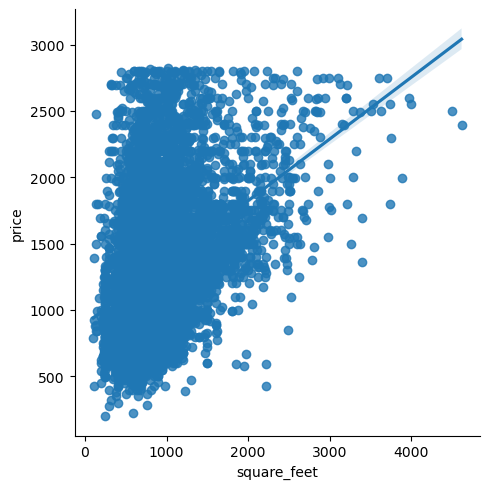

In [68]:
sns.lmplot(data=apt,x="square_feet", y="price")

Insight: Dari contoh visualisasi terlihat garis lurus ke arah kanan atas yang menandakan adanya korelasi nyata dan bernilai positif

#### Amenities (Fasilitas)

In [69]:
corr_r, pval_s = stats.pearsonr(apt["amenities"], apt["price"])
print(f"r-correlation: {corr_r:.5f}, p-value: {pval_s}")

r-correlation: -0.02733, p-value: 0.009024942883766804


Test korelasi kolom amenities menghasilkan nilai korelasi negatif 0.02. Ini menandakan bahwa ada korelasi negatif namun sangatlah kecil antara jumlah fasilitas dengan harga.

#### Bathrooms

In [70]:
corr_r, pval_s = stats.pearsonr(apt["bathrooms"], apt["price"])
print(f"r-correlation: {corr_r:.5f}, p-value: {pval_s}")

r-correlation: 0.36585, p-value: 3.680337888585277e-287


Test korelasi kolom bathrooms menghasilkan nilai korelasi 0.36. Ini menandakan bahwa ada korelasi positif yang moderat antara jumlah kamar mandi suatu apartemen dengan harga.

#### Bedrooms

In [71]:
corr_r, pval_s = stats.pearsonr(apt["bedrooms"], apt["price"])
print(f"r-correlation: {corr_r:.5f}, p-value: {pval_s}")

r-correlation: 0.28915, p-value: 2.650397378210419e-175


Test korelasi kolom bedrooms menghasilkan nilai korelasi 0.28. Ini menandakan bahwa ada korelasi positif yang moderat antara jumlah kamar tidur suatu apartemen dengan harga apartemen tersebut.

#### Has Photo

In [72]:
corr_r, pval_s = stats.pearsonr(apt["has_photo"], apt["price"])
print(f"r-correlation: {corr_r:.5f}, p-value: {pval_s}")

r-correlation: 0.03369, p-value: 0.0012831814141255609


Test korelasi kolom has_photo menghasilkan nilai korelasi 0.03. Ini menandakan bahwa ada korelasi positif yang sangat kecil antara adanya foto atau tidak pada pemasaran apartemen dengan harga.

#### Pets Allowed

In [73]:
corr_r, pval_s = stats.pearsonr(apt["pets_allowed"], apt["price"])
print(f"r-correlation: {corr_r:.5f}, p-value: {pval_s}")

r-correlation: -0.02821, p-value: 0.007031401653991009


Test korelasi kolom pets_allowed menghasilkan nilai korelasi negatif 0.02. Ini menandakan bahwa ada korelasi negatif yang amat kecil antara diperbolahkannya memelihara binatang atau tidak pada pemasaran apartemen dengan harga.

In [74]:
fig = px.imshow(apt.corr(numeric_only=True), text_auto=True)
fig.show()

Insight: Dari visualisasi heatmap di atas beserta data nilai-nilai korelasi antara faktor-faktor pemasaran suatu apartemen dengan harga apartemen tersebut, terlihat bahwa hal yang paling mempengaruhi harga dari suatu unit apartemen adalah luas dari apartemen tersebut. Disusul oleh fasilitas kamar mandi, lalu kamar tidur. Sedikit mengejutkan bahwa fasilitas-fasilitas apartemen kurang berpengaruh pada harga, begitu juga peraturan peliharaan, bahkan bernilai negatif.

## Kesimpulan

Berdasarkan eksplorasi, cleaning, dan analisis data listing apartemen dapat disimpulkan beberapa informasi terkait data apartemen;
- Tabel memiliki 10000 data sebelum cleaning dengan banyak nilai null.
- Setelah cleaning tersisa 9739 data dengan 12 kolom untuk dianalisis.
- Setelah pembersihan outlier kembali turun menjadi 9129 data.
- Terlihat bahwa luas rata-rata apartemen memiliki rentang yang cukup jauh antar state. Dari yang terbesar West Virginia 1581.66 sqft, hingga yang terkecil District of Columbia dengan 537.37 sqft.
- Persebaran jumlah unit apartemen pun rentangnya sangat besar; Texas yang memiliki nilai terbesar 1709 terpaut sangat jauh dengan Wyoming yang hanya memiliki 1 unit apartemen yang disewakan.
- Sedangkan pada segi persentase aturan peliharaan, terbagi cukup rata antara 53,1% yang memperbolehkan baik anjing maupun kucing dan 40,9% yang melarang.
- Harga apartemen memiliki persebaran yang terlihat sangat jauh, rata-rata apartemen dengan harga tertinggi berada dalam state Hawaii sebesar    `$2046,5` dan terendah pada state Wyoming dengan nilai `$713`.
- Terdapat perbedaan signifikan secara statistik antara rata-rata harga apartemen di New Jersey dengan New York.
- Faktor yang mempengaruhi harga unit diuji dengan analisa korelasi pearson test. Kolom yang memiliki korelasi signifikan dengan kolom harga dari test tersebut adalah:
    1. square_feet yaitu luas unit apartemen
    2. bathrooms yaitu jumlah kamar mandi
    3. bedrooms yaitu jumlah kamar tidur

## Rekomendasi

Berdasarkan kesimpulan di atas, rekomendasi yang dapat diberikan untuk meningkatkan penjualan unit apartemen adalah sebagai berikut:
1. Membuat apartemen dengan berbagai tipe seperti studio, 1 bedroom, 2 bedroom, dst. untuk menjangkau market yang besar
2. Meningkatkan promosi dengan mencantumkan foto-foto unit yang memikat pelanggan
3. Memastikan lokasi apartemen berada di daerah metropolitan atau justru kota satelit dapat lebih menguntungkan agar sesuai dengan pasar perantau yang butuh tempat tinggal